# Implementing Great Expectations DQ checks

In [1]:
# Import required libraries

import great_expectations as ge
import pandas as pd

In [2]:
# Intialize the data context

context = ge.get_context()

In [3]:
# Read a sample data file

df = pd.read_csv("https://raw.githubusercontent.com/great-expectations/gx_tutorials/main/data/yellow_tripdata_sample_2019-01.csv")

In [4]:
# View first five records
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-15 03:36:12,2019-01-15 03:42:19,1,1.0,1,N,230,48,1,6.5,0.5,0.5,1.95,0.0,0.3,9.75,NaN
1,1,2019-01-25 18:20:32,2019-01-25 18:26:55,1,0.8,1,N,112,112,1,6.0,1.0,0.5,1.55,0.0,0.3,9.35,0.0
2,1,2019-01-05 06:47:31,2019-01-05 06:52:19,1,1.1,1,N,107,4,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80,NaN
3,1,2019-01-09 15:08:02,2019-01-09 15:20:17,1,2.5,1,N,143,158,1,11.0,0.0,0.5,3.00,0.0,0.3,14.80,NaN
4,1,2019-01-25 18:49:51,2019-01-25 18:56:44,1,0.8,1,N,246,90,1,6.5,1.0,0.5,1.65,0.0,0.3,9.95,0.0


In [5]:
# Using pandas df to create a Great Expectations validator 

validator = context.sources.pandas_default.read_dataframe(df)

In [6]:
# Add expectations

validator.expect_column_values_to_not_be_null("pickup_datetime")
validator.expect_column_values_to_be_between(
    "passenger_count", min_value=1, max_value=6
)
validator.save_expectation_suite(discard_failed_expectations=False)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

In [7]:
# Create checkpoint for expectations

checkpoint = context.add_or_update_checkpoint(
    name="my_quickstart_checkpoint",
    validator=validator,
)

In [8]:
# Get checkpoint result

checkpoint_result = checkpoint.run()

Calculating Metrics:   0%|          | 0/15 [00:00<?, ?it/s]

In [9]:
# Open checkpoint results in a document

context.open_data_docs()

#### Document with results

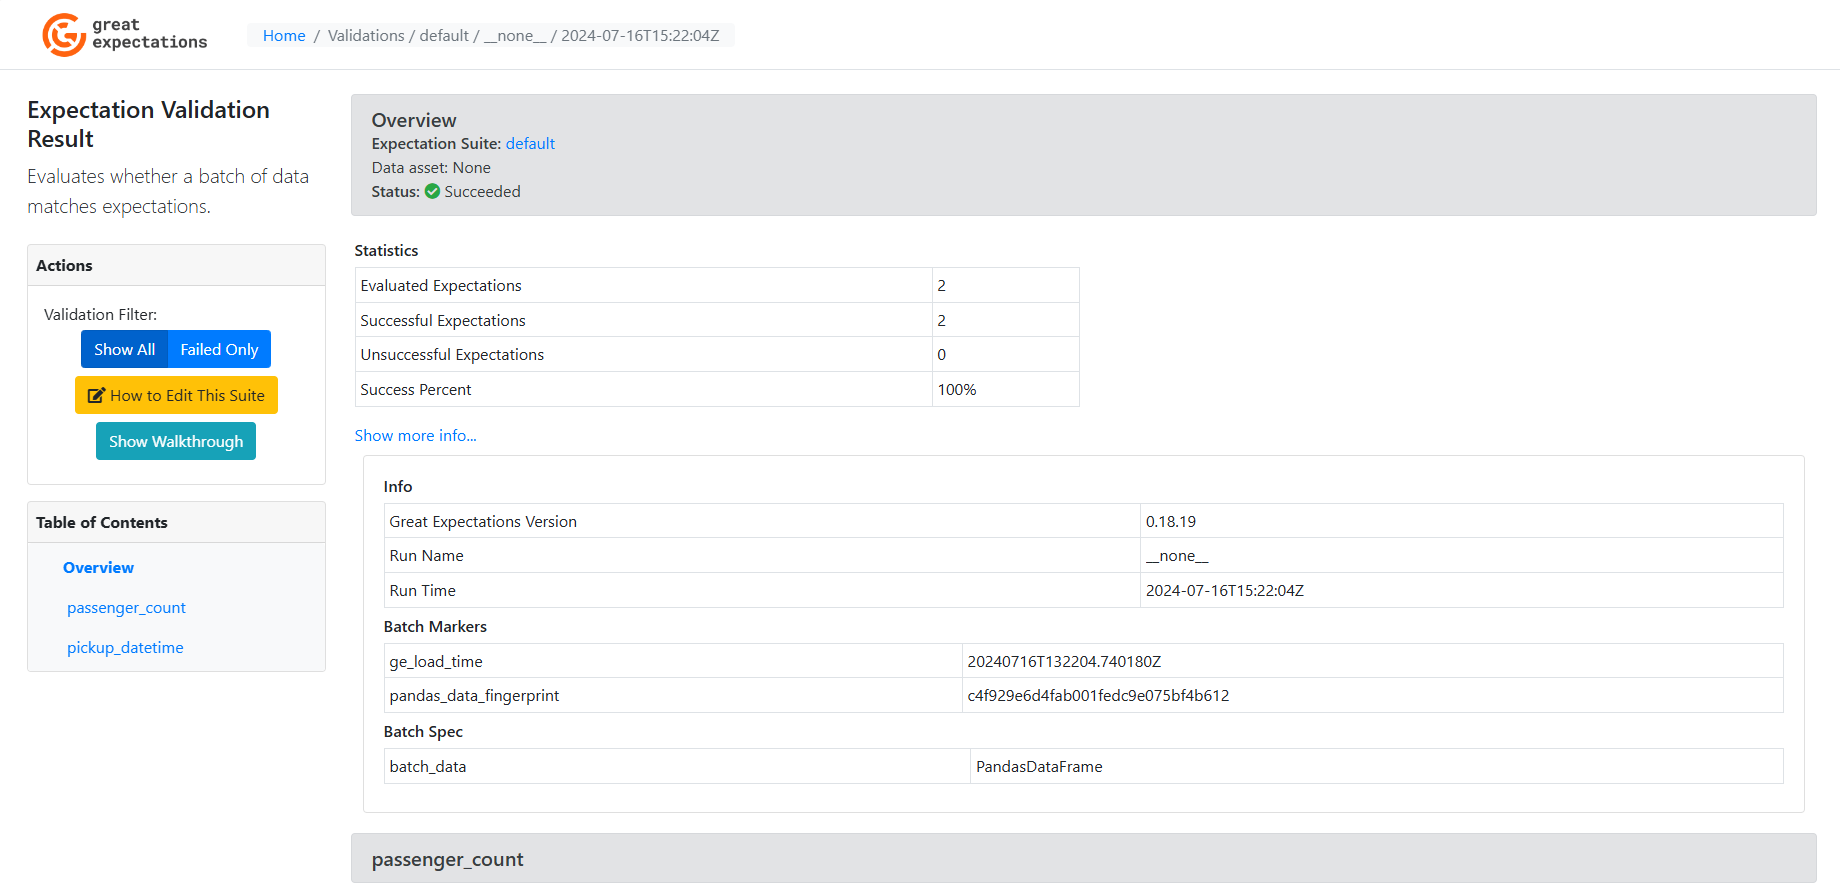